# **Forecasting product sales using ARIMA, Exponential Smoothing, Prophet models**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# URL for the data file and read it into the data frame
url = 'https://raw.githubusercontent.com/bhascarp/Data_Files/main/salesdata.csv'
forecast_df = pd.read_csv(url)

In [ ]:
forecast_df.head()

,Date,Sales
0,01/01/07,4600
1,02/01/07,5700
2,03/01/07,6800
3,04/01/07,7900
4,05/01/07,9000


In [ ]:
forecast_df.describe()

,Sales
count,120.000000
mean,13300.000000
std,3980.414235
min,4600.000000
25%,10300.000000
50%,13300.000000
75%,16300.000000
max,22000.000000


In [ ]:
forecast_df.shape

(120, 2)

In [ ]:
forecast_df.size

240

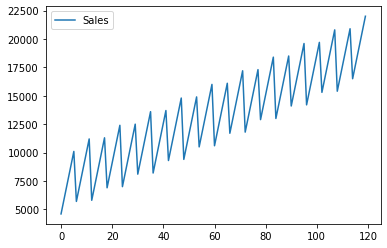

In [ ]:
forecast_df.plot()

In [ ]:
import statsmodels.api as sm

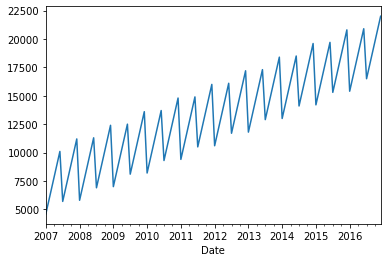

In [ ]:
forecast_df.index=pd.to_datetime(forecast_df['Date'])
forecast_df['Sales'].plot()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


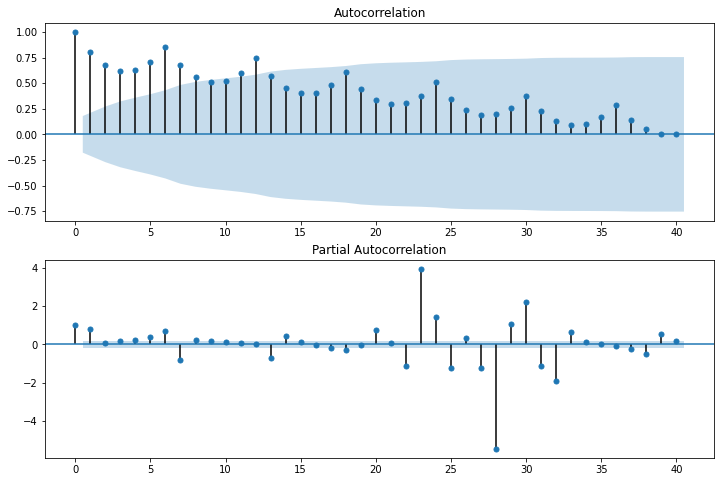

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_df['Sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_df['Sales'], lags=40, ax=ax2)
plt.show()

In [ ]:
print(sm.tsa.stattools.adfuller(forecast_df['Sales']))


(-1.794299449792512, 0.38329550885752744, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -5350.040922143996)


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


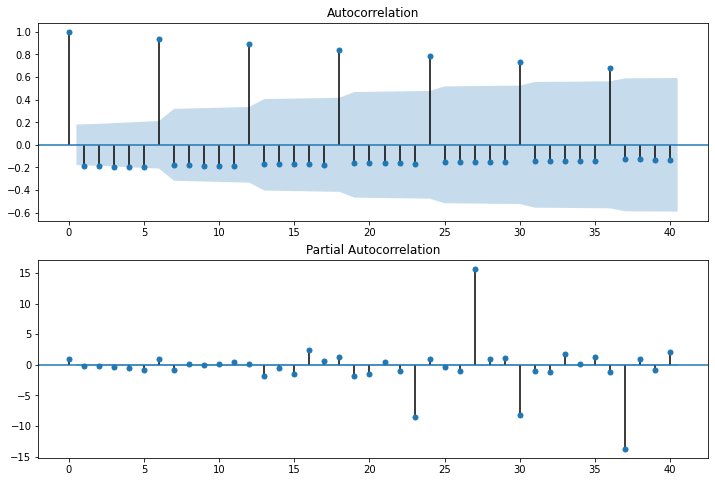

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_df['Sales'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_df['Sales'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [ ]:
model=sm.tsa.ARIMA(endog=forecast_df['Sales'],order=(0,1,6))
results=model.fit()
print(results.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  119
Model:                 ARIMA(0, 1, 6)   Log Likelihood               -1002.613
Method:                       css-mle   S.D. of innovations           1011.299
Date:                Wed, 11 Jan 2023   AIC                           2021.226
Time:                        04:41:05   BIC                           2043.459
Sample:                    02-01-2007   HQIC                          2030.254
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           101.6074      4.979     20.407      0.000      91.849     111.366
ma.L1.D.Sales    -0.5296      0.068     -7.826      0.000      -0.662      -0.397
ma.L2.D.Sales    -0.2231      0.063     

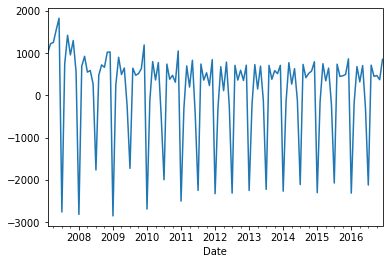

In [ ]:
results.resid.plot()
plt.show()

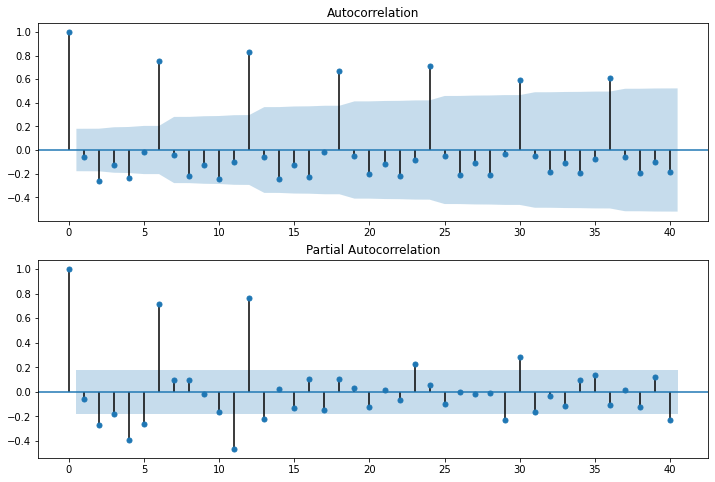

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

In [ ]:
model2=sm.tsa.ARIMA(endog=forecast_df['Sales'],order=(7,1,0))
results2=model2.fit()
print(results2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  119
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -883.884
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 11 Jan 2023   AIC                           1785.768
Time:                        04:41:12   BIC                           1810.780
Sample:                    02-01-2007   HQIC                          1795.925
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           103.1310     14.305      7.209      0.000      75.093     131.169
ar.L1.D.Sales    -0.1918        nan        nan        nan         nan         nan
ar.L2.D.Sales    -0.3825        nan     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


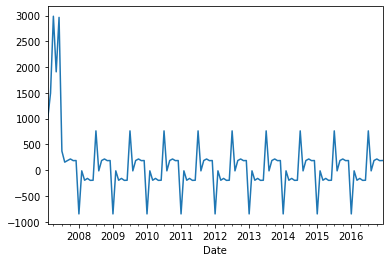

In [ ]:
results2.resid.plot()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


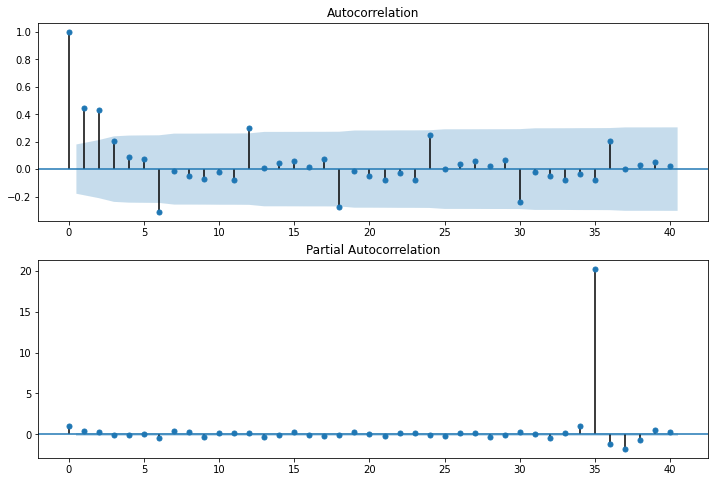

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results2.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results2.resid, lags=40, ax=ax2)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1897: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff) ** 2) * sigma2)


[17448.80651534 18399.06479486 19398.57032924 20415.12026218
 21499.08230816 22600.14233633 18089.72283878 19045.76591518
 20033.60878608 21008.86729135 22093.25197296 23200.34125056]


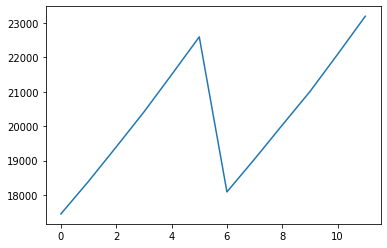

In [ ]:
forecast,std,conf=results2.forecast(12)
plt.plot(forecast)
print(forecast)

In [ ]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.7/589.7 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB

In [ ]:
from darts import TimeSeries


In [ ]:
series = TimeSeries.from_dataframe(forecast_df, 'Date', 'Sales')


In [ ]:
from darts.models import ExponentialSmoothing

In [ ]:
train, val = series.split_before(pd.Timestamp('20150101'))


In [ ]:
model3 = ExponentialSmoothing()

In [ ]:
model3.fit(train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  return self._initialize_heuristic()


In [ ]:
prediction = model3.predict(len(val))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


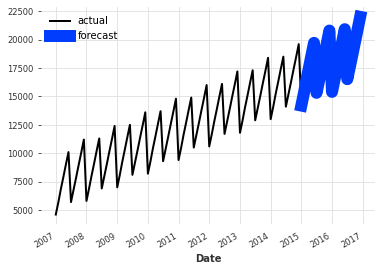

In [ ]:
series.plot(label='actual')
prediction.plot(label='forecast', lw=12)
plt.legend()

In [ ]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

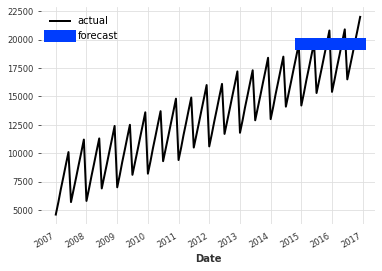

In [ ]:
series.plot(label='actual')
prediction_aarima.plot(label='forecast', lw=12)
plt.legend()

In [ ]:
from darts.models import Prophet

models = [ExponentialSmoothing(), AutoARIMA(), Prophet()]

backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=12)
             for model in models]

/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.8/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.8/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 690, in fit
    )
  File "/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py", line 519, in fit
    els

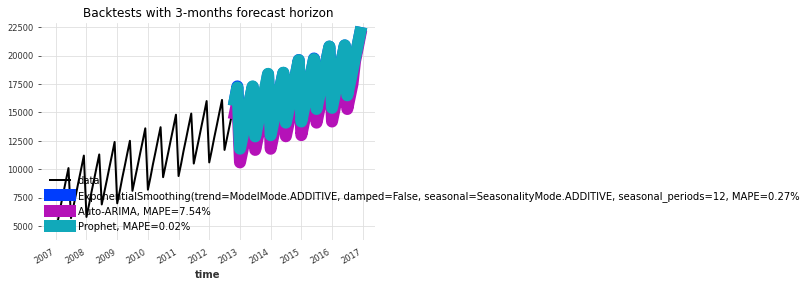

In [ ]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=12, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()